### Итоговая работа по курсу "Математика для Data Science" потока mds-7

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from random import randint

from scipy.optimize import minimize
%matplotlib inline

### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [4]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

<b> a) </b> Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [5]:
from sklearn.metrics import pairwise_distances
dist = pairwise_distances(raitings, metric="cosine")
dist

array([[0.        , 0.17397081, 0.15078471, 0.21659884, 0.18082368,
        0.25881452, 0.27264172, 0.19032478, 0.08934018, 0.13989224],
       [0.17397081, 0.        , 0.18765675, 0.15364663, 0.12861948,
        0.17286893, 0.17370316, 0.19973997, 0.17473692, 0.18031873],
       [0.15078471, 0.18765675, 0.        , 0.15330626, 0.21605701,
        0.20902015, 0.32383777, 0.23710448, 0.17887923, 0.08126949],
       [0.21659884, 0.15364663, 0.15330626, 0.        , 0.30846591,
        0.21334208, 0.16725789, 0.17065333, 0.2229334 , 0.1411313 ],
       [0.18082368, 0.12861948, 0.21605701, 0.30846591, 0.        ,
        0.2235566 , 0.21799532, 0.18763131, 0.12051523, 0.15425211],
       [0.25881452, 0.17286893, 0.20902015, 0.21334208, 0.2235566 ,
        0.        , 0.25988199, 0.15548315, 0.19377124, 0.14485092],
       [0.27264172, 0.17370316, 0.32383777, 0.16725789, 0.21799532,
        0.25988199, 0.        , 0.17330826, 0.18869956, 0.20845282],
       [0.19032478, 0.19973997, 0.2371044

In [7]:
user_index = []
for i in dist:
    a = list(i).index(np.min(i[np.nonzero(i)]))
    user_index.append(a)
    
user_index

[8, 4, 9, 9, 8, 9, 3, 5, 0, 2]

<b> b) </b>Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [8]:
# можно осуществить понижение размерности с помощью svd-разложения
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
reduced = pca.fit_transform(raitings)

reduced

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

In [9]:
# или так 
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

X = raitings
pca = PCA(n_components = 5)
pca.fit(X)
X_reduced = np.dot(X, pca.components_.T)
X_original = np.dot(X_reduced, pca.components_)
X_reduced

array([[-14.42562294,   4.58656128,  -3.11511916,  -1.60103889,
         -3.15319867],
       [ -6.2381279 ,   5.37395842,   3.22380893,   2.96033849,
        -13.16140044],
       [-14.055866  ,  -4.03124884,   0.87237926,  -0.68735241,
         -9.34787025],
       [ -3.96636285,  -3.62291   ,  -2.84190447,  -3.21267898,
         -9.67288865],
       [-10.49064883,  10.20094268,   5.8262248 ,  -2.17451892,
         -8.82142702],
       [ -6.46234237,  -1.11339318,  10.40218859,  -5.76920221,
         -6.98415983],
       [ -0.50002249,   6.44339618,  -2.20932916,  -8.67874479,
        -11.7969803 ],
       [ -3.71917935,   1.64031623,   2.83244853,  -6.19804739,
         -2.10934215],
       [-14.90011072,   7.9559339 ,   0.33704499,  -8.01587444,
         -8.44505058],
       [-16.39933583,  -0.85992835,   2.85106876,  -9.65207068,
        -13.0894574 ]])

In [10]:
mean_squared_error(X, X_original)

24.683375288903374

### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

In [21]:
import sympy
from sympy import diff, symbols, cos, sin, tan, symbols, lambdify

In [22]:
x = symbols('x')      #x, y = symbols('x y')
f_x = np.power(tan((sin(x)+cos(2*x+3))),2)
dfdx = diff(f_x)
dfdx

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [23]:
lambdify((x), dfdx) (1)

55.385917635337854

Решение в LaTeX:

Для вычисления нам понадобится правила [вычисления производной](https://planetcalc.ru/675/).  
И [формулы тригонометрии](https://doza.pro/art/math/geometry/trig-formulas), чтобы привести один в один к полученному с помощью python выражению.

$f(x)=tan^2(sin(x)+cos(2x+3))$  

$$f'(x)=2{\cdot}tan(sin(x)+cos(2x+3)){\cdot}(tan(sin(x)+cos(2x+3)))'$$   
$$f'(x)=2{\cdot}tan(sin(x)+cos(2x+3)){\cdot}(tan(sin(x)+cos(2x+3)))'$$
$$f'(x)=2{\cdot}tan(sin(x)+cos(2x+3)){\cdot}(1+tan^2(sin(x)+cos(2x+3))){\cdot}(sin(x)+cos(2x+3))'$$  
$$f'(x)=2{\cdot}tan(sin(x)+cos(2x+3)){\cdot}(1+tan^2(sin(x)+cos(2x+3))){\cdot}(cos(x)-sin(2x+3){\cdot}(2x+3)')$$

Окончательно:  

$$f'(x)=2{\cdot}tan(sin(x)+cos(2x+3)){\cdot}(1+tan^2(sin(x)+cos(2x+3))){\cdot}(cos(x)-2{\cdot}sin(2x+3))$$

Можно ещё подставить единичку $x_0=1\$.
$$f'(1)=2{\cdot}tan(sin(1)+cos(2{\cdot}1+3)){\cdot}(1+tan^2(sin(1)+cos(2{\cdot}1+3))){\cdot}(cos(1)-2{\cdot}sin(2{\cdot}1+3))$$

### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>

In [25]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [26]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [27]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

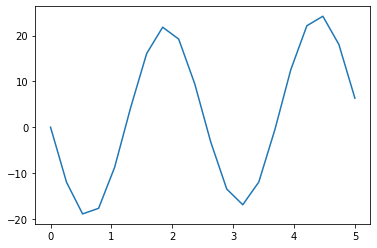

In [28]:
plt.plot(x, fx)
plt.show()

In [29]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [31]:
res = minimize(error, (-1,0), method='COBYLA')
print(res)

     fun: 0.07203835682314086
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 168
  status: 1
 success: True
       x: array([ 3.00000377, -2.4998895 ])


In [32]:
params = (3.00000377, -2.4998895)
error(params)

0.07203815082295684

### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [43]:
# создадим дискретную случайную велечину рэндомно
random_vars = np.random.random(20)
# создадим рэндомно плотности вероятностей значений с.в.
list_of_random_floats = np.random.random(20) 
probabilities = list_of_random_floats / list_of_random_floats.sum()

In [44]:
sum(probabilities)

0.9999999999999998

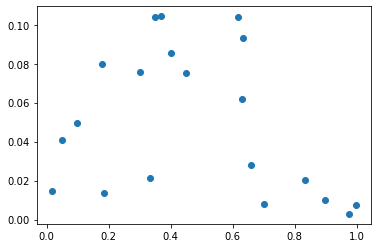

In [45]:
plt.scatter(random_vars, probabilities)
plt.show()

In [48]:
# параметры запуска: размеры выборок и количество повторов генерации
n1 = 50
samples_count = 1000

#массив для сохранения средних по выборкам
a1 = np.array([])

for number in range(samples_count):
    # на каждом цикле генерируем выборки размера n1
    sample = np.random.choice(random_vars, n1, p=probabilities)
    # считаем среднее по каждой выборке и добавляем в массив средних
    a1 = np.append(a1, sample.mean())

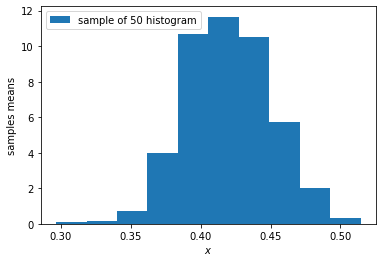

In [50]:
#строим график
label_1 = 'sample of ' + str(n1) + ' histogram'
plt.hist(a1, density=True, label=label_1)

plt.legend()
plt.ylabel('samples means')
plt.xlabel('$x$')
plt.show()

### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

 [1, 1]]

In [4]:
a = np.array([[1, 4],[1, 1]])
print(a)

[[1 4]
 [1 1]]


In [5]:
w, v = np.linalg.eig((a))
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

Собственное значение 3.0000000000000004
соответствующий ему собственный вектор [0.89442719 0.4472136 ]
Собственное значение -0.9999999999999996
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]


### Решение на бумажке:

Дана матрица $a =\begin{pmatrix}
  1& 4\\
  1& 1
\end{pmatrix}.$  

Характеристическое уравнение имеет вид:  
$\begin{vmatrix}
  1-w& 4\\
  1& 1-w
\end{vmatrix}=0.$  


Решение характеристического уравнения сводится к поиску корней квадратного уравнения вида:
$w^2-2w-3=0.$  

По теореме Виета:  
\begin{equation*}
 \begin{cases}
   w_1+w_2=2, 
   \\
   w_1{\cdot}w_2=-3.
 \end{cases}
\end{equation*}

Следовательно, видно, что наши собственные вектора принимают значения:  
$w_1=3,$  
$w_2=-1.$  

Подставим поочерёдно полученные собственные значения в характеристическое уравнение и получим пару систем уравнений.

Случай №1.  

$w_1=3$  

Тогда из характеристического уравнения получим:  

$\begin{equation*}
 \begin{cases}
   -2x+4y=0, 
   \\
   x-2y=0.
 \end{cases}
\end{equation*}$

В результате получаем линейную зависимость $x=2y.$  

Откуда собственный вектор (фактически, направление):

$w_1=\begin{pmatrix}
  2\\
  1
\end{pmatrix}.$

Случай №2.  

$w_2=-1$  

Тогда из характеристического уравнения получим:  

$\begin{equation*}
 \begin{cases}
   2x+4y=0, 
   \\
   x+2y=0.
 \end{cases}
\end{equation*}$

В результате получаем линейную зависимость $x=-2y.$  

Откуда собственный вектор (фактически, направление):

$w_2=\begin{pmatrix}
  -2\\
  1
\end{pmatrix}.$
